Importing Libraries

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report

Preparation Of Data

In [9]:
df=pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Exploratory Data Analysis

In [11]:
concolumns=["age","trestbps","chol","thalach","oldpeak"]
df[concolumns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
over_30=df[df['age']>30]
over_30.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


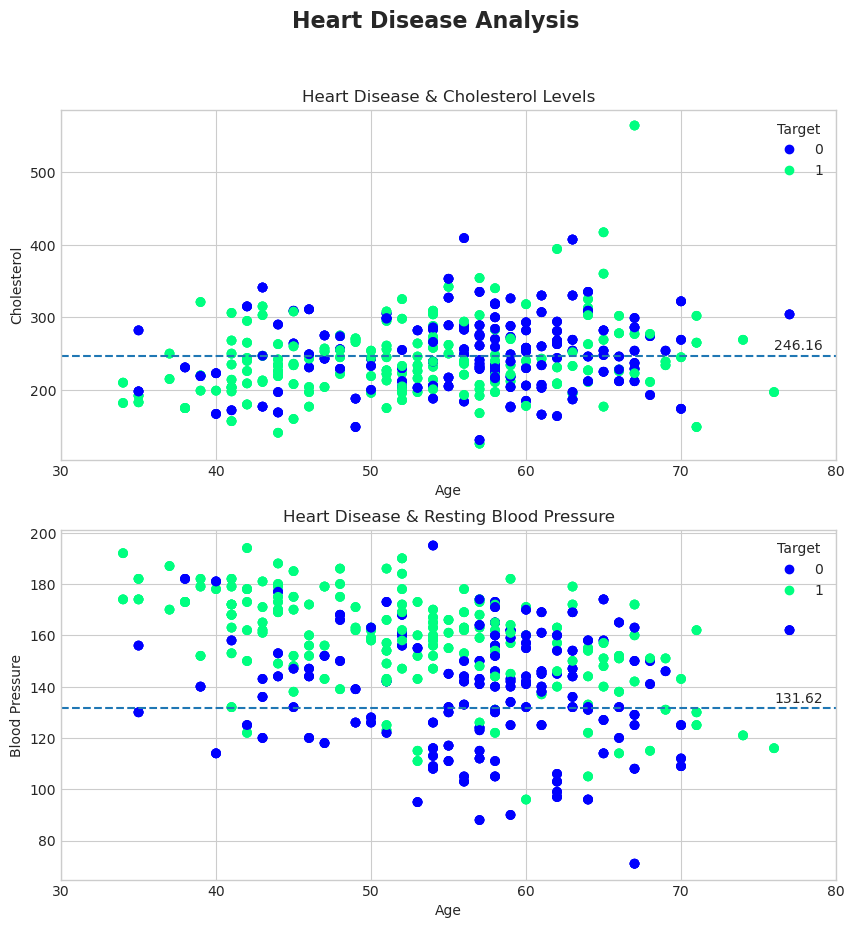

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Heart Disease & Cholesterol Levels
ax0.scatter(x=over_30["age"], y=over_30["chol"], c=over_30["target"], cmap="winter")
ax0.set(title="Heart Disease & Cholesterol Levels", xlabel="Age", ylabel="Cholesterol", xlim=[30, 80])
ax0.legend(*ax0.collections[0].legend_elements(), title="Target")
ax0.axhline(y=over_30["chol"].mean(), linestyle="--")
ax0.text(76, over_30["chol"].mean() + 10, round(over_30["chol"].mean(), 2))

# Heart Disease & Resting Blood Pressure
ax1.scatter(x=over_30["age"], y=over_30["thalach"], c=over_30["target"], cmap="winter")
ax1.set(title="Heart Disease & Resting Blood Pressure", xlabel="Age", ylabel="Blood Pressure", xlim=[30, 80])
ax1.legend(*ax1.collections[0].legend_elements(), title="Target")
ax1.axhline(y=over_30["trestbps"].mean(), linestyle="--")
ax1.text(76, over_30["trestbps"].mean() + 2, round(over_30["trestbps"].mean(), 2))

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

plt.show()


In [18]:
for column in df.columns: 
       num=len(df[column].unique())
       print(column,":",num)

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


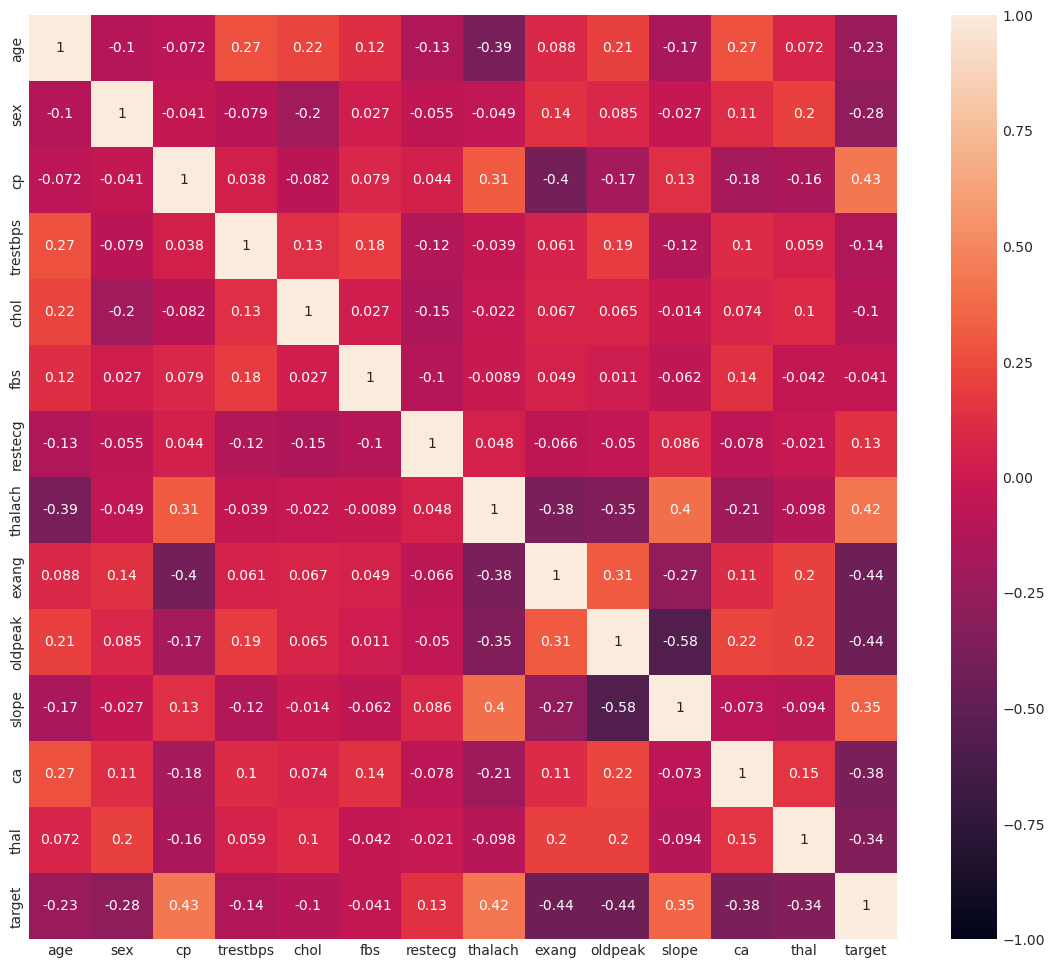

In [19]:
plt.figure(figsize=(14,12)) 
sn.heatmap(df.corr(), annot=True , vmin=-1) 
plt.show()
